In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from scipy import stats
import pickle
#%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/M-ODE/Desktop/Apziva/projects/2nd Project/term-marketting/data/term-deposit-marketing-2020.csv')

## Exploratory Data Analysis

In [3]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [7]:
df.count()

age          40000
job          40000
marital      40000
education    40000
default      40000
balance      40000
housing      40000
loan         40000
contact      40000
day          40000
month        40000
duration     40000
campaign     40000
y            40000
dtype: int64

In [8]:
# Data Imbalance: almost 93% of the data has a target class of "No", and only 7% has the target class "Yes"
df['y'].value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64

In [9]:
df['marital'].value_counts()

marital
married     24386
single      10889
divorced     4725
Name: count, dtype: int64

### Missing Value Treatment

In [10]:
#df[df['contact']!='unknown']

In [11]:
# checking null/unknown columns 
columns_with_unknown = df.columns[df.isin(["unknown"]).any()]
columns_with_unknown


Index(['job', 'education', 'contact'], dtype='object')

In [12]:
# replace unknown with NA
df[columns_with_unknown] = df[columns_with_unknown].replace("unknown", pd.NA)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,<NA>,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,<NA>,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,<NA>,5,may,76,1,no
3,47,blue-collar,married,<NA>,no,1506,yes,no,<NA>,5,may,92,1,no
4,33,<NA>,single,<NA>,no,1,no,no,<NA>,5,may,198,1,no


In [13]:
# sum NA 
missing_values = df.isna().sum()
missing_values

age              0
job            235
marital          0
education     1531
default          0
balance          0
housing          0
loan             0
contact      12765
day              0
month            0
duration         0
campaign         0
y                0
dtype: int64

In [14]:
# Mode imputation for categorical columns
for column in columns_with_unknown:
    mode_value = df[column].mode()[0]  # Get the mode (most frequent value)
    df[column] = df[column].fillna(mode_value)

### Data Visualization 

In [15]:
# Feature Relationship and Data Distribution

<Axes: xlabel='y', ylabel='count'>

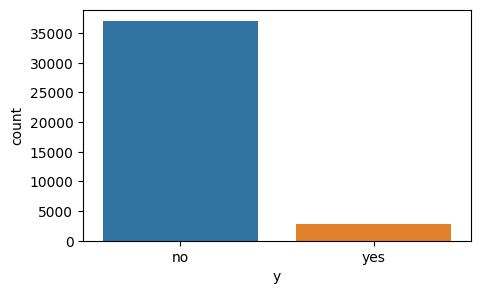

In [17]:
#Target Label Disribution
plt.figure(figsize=(5,3))
sns.countplot(x=df['y'],data=df)

<Axes: xlabel='balance', ylabel='Density'>

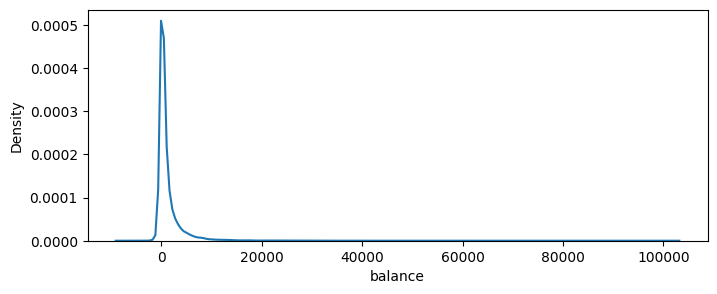

In [18]:
# Feature Distributions; balance
plt.figure(figsize=(8,3))
sns.kdeplot(data=df,x='balance')


<Axes: xlabel='age', ylabel='Density'>

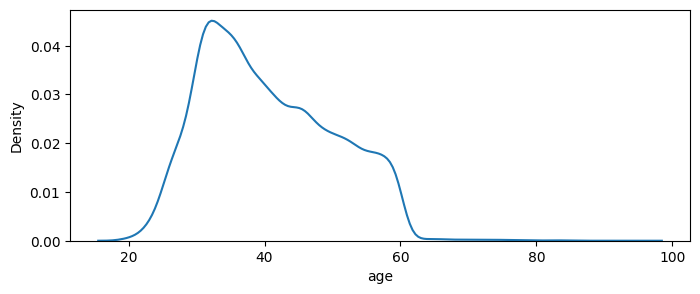

In [19]:
# Feature Distributions; age
plt.figure(figsize=(8,3))
sns.kdeplot(data=df,x='age')

<Axes: xlabel='duration', ylabel='Density'>

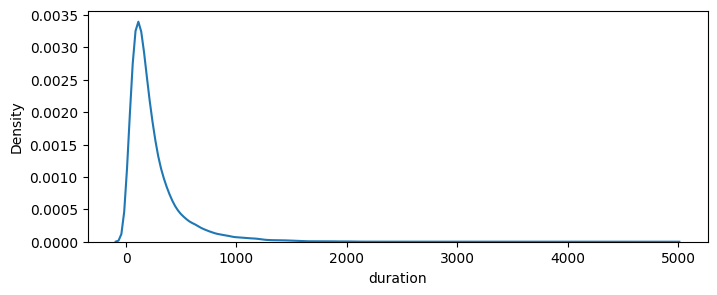

In [20]:
# Feature Distributions; Duration
plt.figure(figsize=(8,3))
sns.kdeplot(data=df,x='duration')

<Axes: xlabel='day', ylabel='Density'>

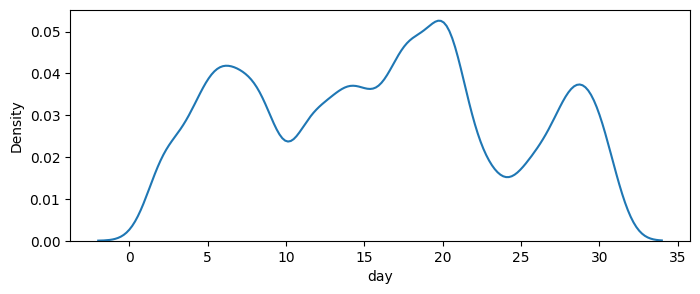

In [21]:
# Feature Distributions; Day
plt.figure(figsize=(8,3))
sns.kdeplot(data=df,x='day')

In [22]:
df["job"].value_counts()

job
blue-collar      9618
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
Name: count, dtype: int64

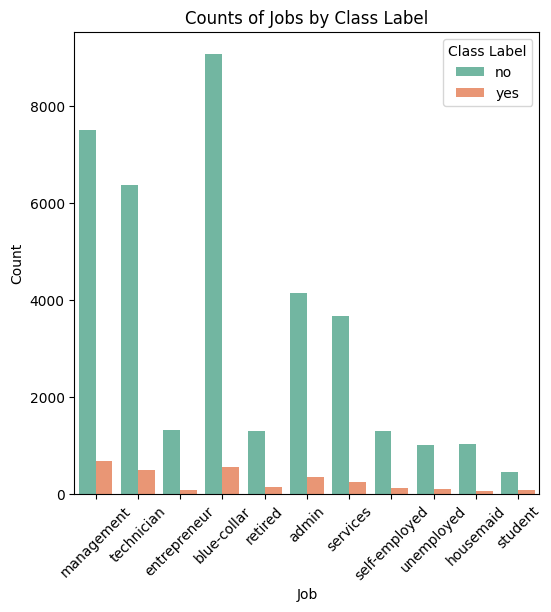

In [23]:
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='job', hue='y', palette='Set2')
plt.title('Counts of Jobs by Class Label')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Class Label', loc='upper right')
plt.show()

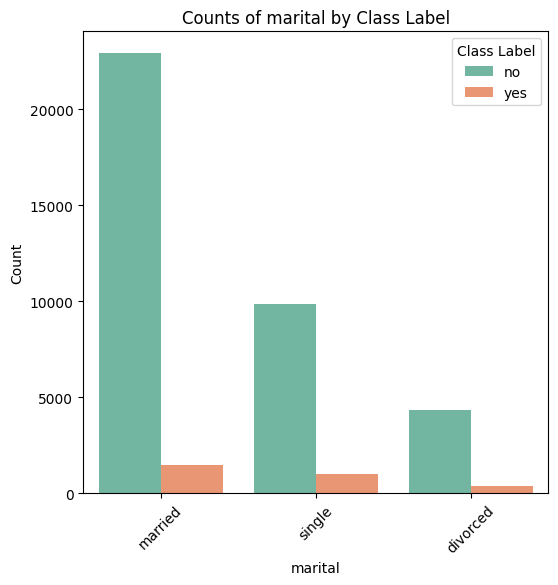

In [24]:
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='marital', hue='y', palette='Set2')
plt.title('Counts of marital by Class Label')
plt.xlabel('marital')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Class Label', loc='upper right')
plt.show()

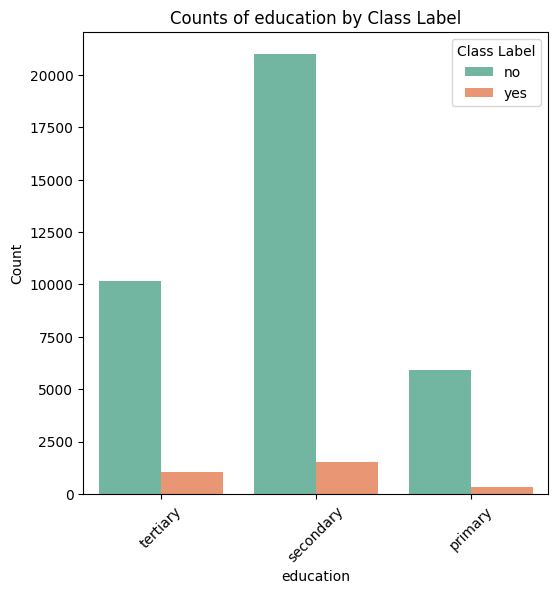

In [25]:
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='education', hue='y', palette='Set2')
plt.title('Counts of education by Class Label')
plt.xlabel('education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Class Label', loc='upper right')
plt.show()

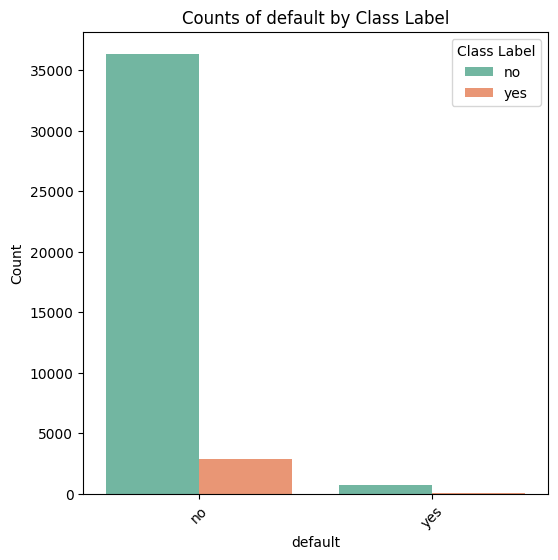

In [26]:
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='default', hue='y', palette='Set2')
plt.title('Counts of default by Class Label')
plt.xlabel('default')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Class Label', loc='upper right')
plt.show()

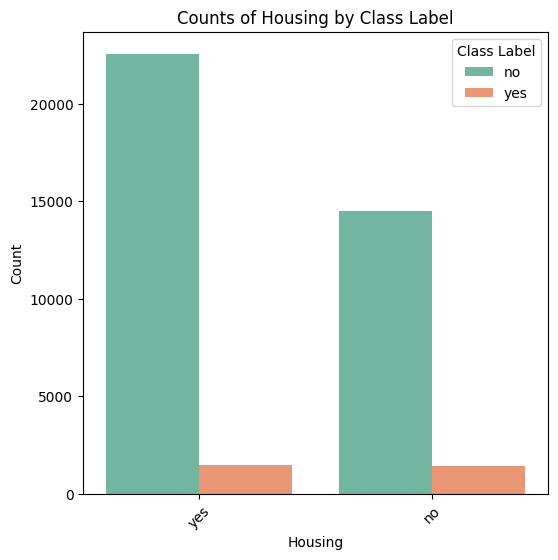

In [27]:
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='housing', hue='y', palette='Set2')
plt.title('Counts of Housing by Class Label')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Class Label', loc='upper right')
plt.show()

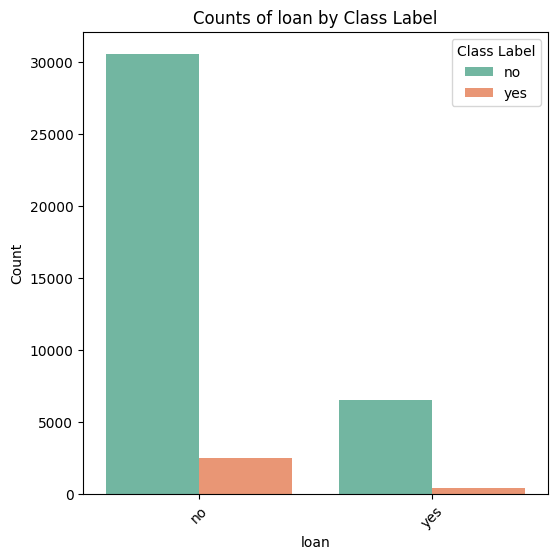

In [28]:
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='loan', hue='y', palette='Set2')
plt.title('Counts of loan by Class Label')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Class Label', loc='upper right')
plt.show()

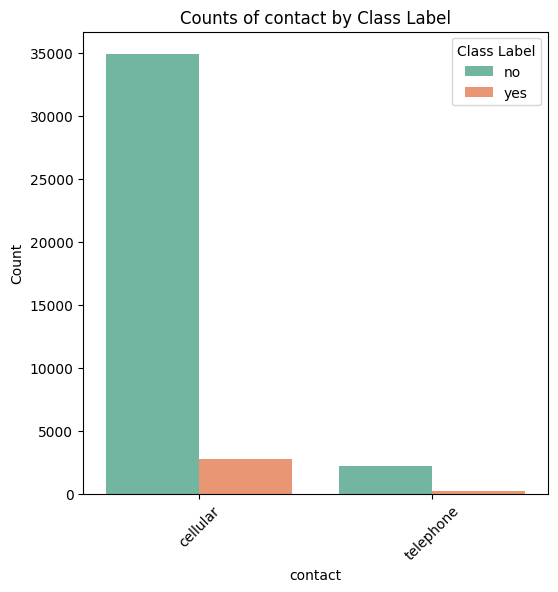

In [29]:
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='contact', hue='y', palette='Set2')
plt.title('Counts of contact by Class Label')
plt.xlabel('contact')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Class Label', loc='upper right')
plt.show()

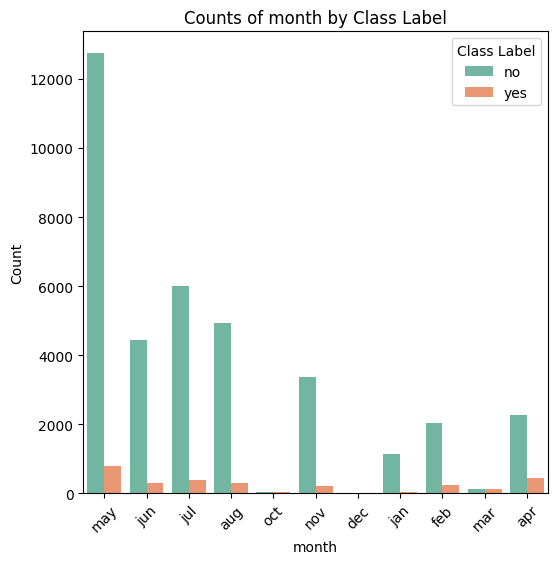

In [30]:
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='month', hue='y', palette='Set2')
plt.title('Counts of month by Class Label')
plt.xlabel('month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Class Label', loc='upper right')
plt.show()

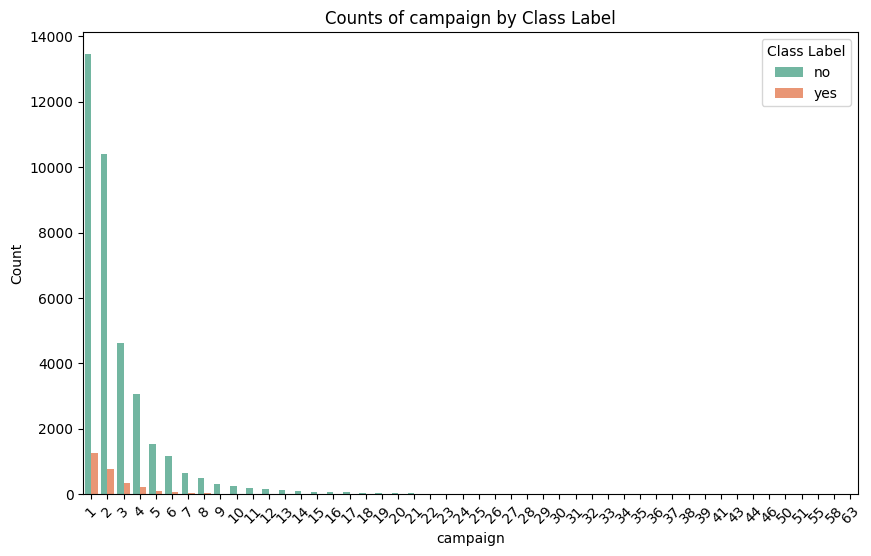

In [31]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='campaign', hue='y', palette='Set2')
plt.title('Counts of campaign by Class Label')
plt.xlabel('campaign')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Class Label', loc='upper right')
plt.show()

([<matplotlib.patches.Wedge at 0x1d10a064d10>,
 [Text(0.8736001857723508, 0.8226923577003218, 'blue-collar'),
  Text(-0.6589849061495945, 1.0028653416421418, 'management'),
  Text(-1.178390044231934, -0.22670885217622294, 'technician'),
  Text(-0.5652604751083077, -1.0585275600003667, 'admin'),
  Text(0.20148527855211498, -1.1829639396561404, 'services'),
  Text(0.6662923890895853, -0.998025276353907, 'retired'),
  Text(0.8712705592511899, -0.8251591437911349, 'self-employed'),
  Text(1.0312073535969508, -0.6136867229194171, 'entrepreneur'),
  Text(1.1314002986858671, -0.39991669649256995, 'unemployed'),
  Text(1.1831690312582117, -0.2002774162792824, 'housemaid'),
  Text(1.1989839079912836, -0.04937193917549704, 'student')],
 [Text(0.8008001702913217, 0.754134661225295, '24%'),
  Text(-0.604069497303795, 0.9192932298386302, '20%'),
  Text(-1.080190873879273, -0.20781644782820438, '17%'),
  Text(-0.5181554355159488, -0.9703169300003363, '11%'),
  Text(0.1846948386727721, -1.08438361135

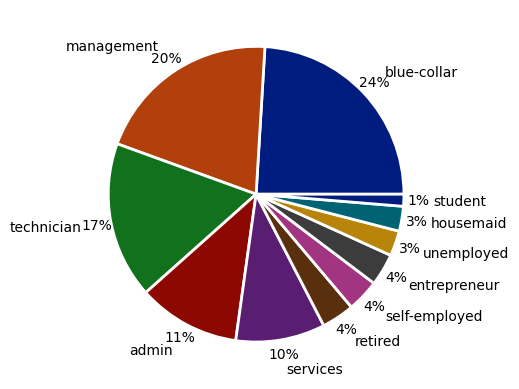

In [32]:
# pie chart for percenteage of jobs 
jobs=df['job'].value_counts().to_dict()
keys=jobs.keys()
data=jobs.values()

palette_color = sns.color_palette('dark')
wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}

plt.pie(data,labels=keys,colors=palette_color,autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2,wedgeprops=wedgeprops)

([<matplotlib.patches.Wedge at 0x1d10a103f10>,
 [Text(1.298604231431996, 0.0602249956987524, 'Age:Below 25'),
  Text(1.2029885242469414, 0.49276628388128, 'Age:25-30'),
  Text(-0.5471305435873496, 1.1792574647946104, 'Age:30-40'),
  Text(-0.6624868110740397, -1.118530833349242, 'Age:40-50'),
  Text(1.0368903199414374, -0.7841291120802387, 'Age:50-60'),
  Text(1.2997194793075295, -0.027005094122493304, 'Age:Above 60')],
 [Text(1.0988189650578428, 0.050959611745098186, '1%'),
  Text(1.017913366670489, 0.4169560863610831, '9%'),
  Text(-0.46295661380468045, 0.9978332394415934, '42%'),
  Text(-0.5605657632164952, -0.9464491666801279, '27%'),
  Text(0.8773687322581394, -0.6634938640678943, '19%'),
  Text(1.0997626363371404, -0.022850464257494336, '1%')])

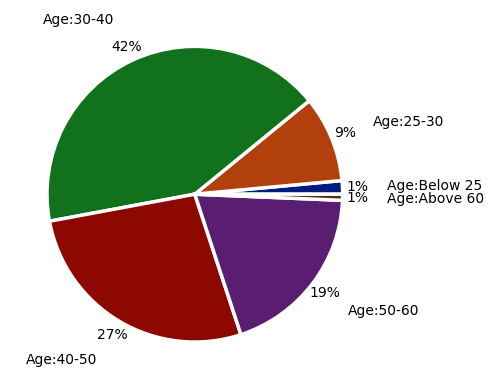

In [33]:
# pie chart for sectioned age groups; min 19 - max 95

age_1= df[df['age'] < 25 ]['age'] #age below 25 
age_2 = df[(df['age'] > 25) & (df['age'] < 30)]['age'] # ages from 25 to 30
age_3= df[(df['age'] > 30) & (df['age'] < 40)]['age'] # ages from 30 to 40
age_4= df[(df['age'] > 40) & (df['age'] < 50)]['age'] # ages from 30 to 40
age_5= df[(df['age'] > 50) & (df['age'] < 60)]['age'] # ages from 30 to 40
age_6= df[df['age'] > 60 ]['age'] #age above 60

age_1_count=age_1.count()
age_2_count=age_2.count()
age_3_count=age_3.count()
age_4_count=age_4.count()
age_5_count=age_5.count()
age_6_count=age_6.count()

age_group={'Age:Below 25': age_1_count, 'Age:25-30': age_2_count,'Age:30-40': age_3_count,'Age:40-50': age_4_count,'Age:50-60': age_5_count,'Age:Above 60': age_6_count}


age_keys=age_group.keys()
age_data=age_group.values()

palette_color = sns.color_palette('dark')
wedgeprops = {'linewidth': 2.5, 'edgecolor': 'white'}

plt.pie(age_data,labels=age_keys,colors=palette_color,autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.3,wedgeprops=wedgeprops)

In [34]:
# Label encode the categorical variable ..... To generate Correlation data frame and heatmap 
df1=df.copy()

df1['job'] = pd.factorize(df1['job'])[0]
df1['marital'] = pd.factorize(df1['marital'])[0]
df1['education'] = pd.factorize(df1['education'])[0]
df1['default'] = pd.factorize(df1['housing'])[0]
df1['loan'] = pd.factorize(df1['loan'])[0]
df1['contact'] = pd.factorize(df1['contact'])[0]
df1['month'] = pd.factorize(df1['month'])[0]
df1['y'] = pd.factorize(df1['y'])[0]
df1['housing'] = pd.factorize(df1['housing'])[0]


<Axes: >

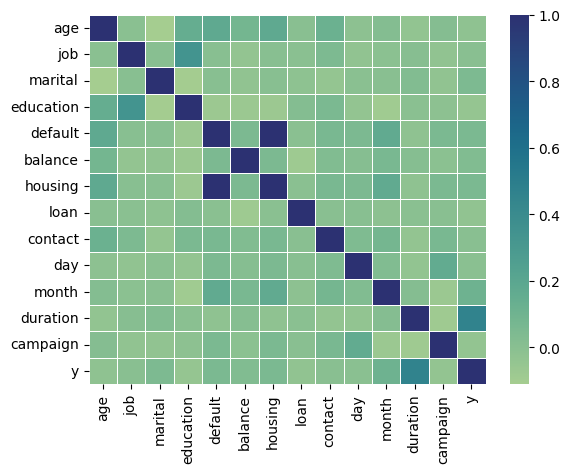

In [35]:
# Feature Correlation 
corr_df=pd.DataFrame(df1.corr())
sns.heatmap(corr_df,linewidth=0.5,cmap='crest') 


In [36]:
corr_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
age,1.000000,-0.002469,-0.110860,0.147335,0.179606,0.081517,0.179606,0.000041,0.120689,-0.011689,0.022965,-0.036270,0.016204,-0.020273
job,-0.002469,1.000000,0.001982,0.337241,0.002767,-0.038084,0.002767,-0.003836,0.045934,-0.028554,-0.007529,0.010057,-0.030121,-0.000177
marital,-0.110860,0.001982,1.000000,-0.106463,0.002648,-0.028563,0.002648,-0.015606,-0.043581,-0.005545,-0.000393,0.023746,-0.028798,0.046550
education,0.147335,0.337241,-0.106463,1.000000,-0.074243,-0.069176,-0.074243,0.021786,0.055234,-0.039727,-0.091368,-0.003885,-0.013129,-0.047336
default,0.179606,0.002767,0.002648,-0.074243,1.000000,0.049946,1.000000,-0.004266,0.059696,0.050622,0.167039,-0.022455,0.054823,0.054336
balance,0.081517,-0.038084,-0.028563,-0.069176,0.049946,1.000000,0.049946,-0.080596,0.029116,0.011662,0.059003,0.014072,-0.008137,0.030232
housing,0.179606,0.002767,0.002648,-0.074243,1.000000,0.049946,1.000000,-0.004266,0.059696,0.050622,0.167039,-0.022455,0.054823,0.054336
loan,0.000041,-0.003836,-0.015606,0.021786,-0.004266,-0.080596,-0.004266,1.000000,-0.001727,0.005838,-0.014806,-0.003952,0.000582,-0.031029
contact,0.120689,0.045934,-0.043581,0.055234,0.059696,0.029116,0.059696,-0.001727,1.000000,0.037242,0.077645,-0.040379,0.061620,-0.000842
day,-0.011689,-0.028554,-0.005545,-0.039727,0.050622,0.011662,0.050622,0.005838,0.037242,1.000000,0.029379,-0.032983,0.165429,-0.006420


In [37]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# feature engineering

### categorical variables encoding

#### Label Encoding

In [38]:
# Label encode the categorical variable 
df['job'] = pd.factorize(df['job'])[0]
df['marital'] = pd.factorize(df['marital'])[0]
df['education'] = pd.factorize(df['education'])[0]
df['default'] = pd.factorize(df['housing'])[0]
df['loan'] = pd.factorize(df['loan'])[0]
df['contact'] = pd.factorize(df['contact'])[0]
df['month'] = pd.factorize(df['month'])[0]
df['y'] = pd.factorize(df['y'])[0]
df['housing'] = pd.factorize(df['housing'])[0]


### Feature Scalling

In [39]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()

x_numeric=df.drop(['job','marital', 'education','default','housing','loan','contact','month','y'],axis=1)
x_categorical= df.drop(["age", "balance", "day", "duration", "campaign"],axis=1)


x_numeric_scaled = pd.DataFrame(scaler.fit_transform(x_numeric), columns=x_numeric.columns) # Z-Score Scaling

#append new scaled 
df_new=pd.concat([x_numeric_scaled,x_categorical],axis=1)
df_new

,age,balance,day,duration,campaign,job,marital,education,default,housing,loan,contact,month,y
0,1.810415,0.299174,-1.330900,0.023811,-0.581096,0,0,0,0,0,0,0,0,0
1,0.358382,-0.428854,-1.330900,-0.400305,-0.581096,1,1,1,0,0,0,0,0,0
2,-0.782501,-0.438152,-1.330900,-0.689474,-0.581096,2,0,1,0,0,1,0,0,0
3,0.669532,0.079802,-1.330900,-0.627785,-0.581096,3,0,1,0,0,0,0,0,0
4,-0.782501,-0.438497,-1.330900,-0.219092,-0.581096,3,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.291832,-0.302809,-1.572504,-0.569951,-0.581096,1,0,0,1,1,0,0,1,0
39996,-1.093650,0.711402,-1.572504,-0.064868,0.036377,0,1,0,1,1,0,0,1,1
39997,1.395549,-0.369964,-1.572504,-0.327048,-0.581096,5,2,1,1,1,0,0,1,1
39998,-0.678784,-0.078271,-1.572504,0.336114,-0.581096,0,0,0,1,1,0,0,1,0


### class imbalancing techniques

#### SMOTE 

In [40]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df_new.drop('y', axis=1)
y = df_new['y']

smote = SMOTE(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled arrays back to DataFrames
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['y'])

print('Class distribution before resampling:', Counter(y))
print('Class distribution after resampling:', Counter(y_resampled))


Class distribution before resampling: Counter({0: 37104, 1: 2896})
Class distribution after resampling: Counter({0: 37104, 1: 37104})


In [41]:
#merge resampled df
df_new_final=pd.concat([X_resampled_df,y_resampled_df],axis=1)

# Building Models

In [42]:
import numpy as np
from sklearn import svm, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [43]:
# preparing the data 
x=df_new_final.drop(['y'], axis=1)
y=df_new_final['y'] 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0) # 70% training and 


#### SVM

In [44]:
#Create a svm Classifier
svc = svm.SVC(kernel='rbf',random_state=1) 
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

# Use cross-validation to evaluate the model
scores = cross_val_score(svc, X_train, y_train,scoring="f1", cv=5)
print("Cross-validation scores (f1 Score):", scores)
print("Mean F1 Score (cross validation):", np.mean(scores))

Accuracy: 0.8734222701343035
F1 Score: 0.8786391042204996
Cross-validation scores (f1 Score): [0.87522332 0.8794433  0.88293557 0.8777705  0.87664288]
Mean F1 Score (cross validation): 0.87840311489391


In [45]:
# classification Report 
report_test = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     10995
           1       0.85      0.91      0.88     11268

    accuracy                           0.87     22263
   macro avg       0.88      0.87      0.87     22263
weighted avg       0.87      0.87      0.87     22263



In [46]:
# Create Decision Tree classifer
dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

# Use cross-validation to evaluate the model
scores = cross_val_score(dt, X_train, y_train,scoring="f1", cv=5)
print("Cross-validation scores (f1 Score):", scores)
print("Mean F1 Score (cross validation):", np.mean(scores))

Accuracy: 0.9277725373938822
F1 Score: 0.929181714084383
Cross-validation scores (f1 Score): [0.92238059 0.92279728 0.92789246 0.92519874 0.92393179]
Mean F1 Score (cross validation): 0.9244401709677856


In [47]:
# classification Report 
report_test = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10995
           1       0.92      0.94      0.93     11268

    accuracy                           0.93     22263
   macro avg       0.93      0.93      0.93     22263
weighted avg       0.93      0.93      0.93     22263



In [48]:
#logestic regression classifier

logr= linear_model.LogisticRegression(random_state=1)
logr=logr.fit(X_train,y_train)
y_pred=logr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

# Use cross-validation to evaluate the model
scores=cross_val_score(logr, X_train,y_train, scoring="f1",cv=5)
print("Cross-validation scores (f1 Score):", scores)
print("Mean F1 Score (cross validation):", np.mean(scores))

Accuracy: 0.8380721376274536
F1 Score: 0.8376491781130376
Cross-validation scores (f1 Score): [0.83577713 0.84491874 0.84779628 0.84078922 0.83749263]
Mean F1 Score (cross validation): 0.841354798210643


In [49]:
# classification Report 
report_test = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     10995
           1       0.85      0.83      0.84     11268

    accuracy                           0.84     22263
   macro avg       0.84      0.84      0.84     22263
weighted avg       0.84      0.84      0.84     22263



In [50]:
# KNN

knn= KNeighborsClassifier()
knn=knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

# Use cross-validation to evaluate the model
scores=cross_val_score(knn, X_train,y_train, scoring="f1",cv=5)
print("Cross-validation scores (f1 Score):", scores)

print("Mean F1 Score (cross validation):", np.mean(scores))

Accuracy: 0.9266945155639402
F1 Score: 0.9316582914572863
Cross-validation scores (f1 Score): [0.92727439 0.9277712  0.93080153 0.92235038 0.92477231]
Mean F1 Score (cross validation): 0.926593961958196


In [51]:
# classification Report 
report_test = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     10995
           1       0.88      0.99      0.93     11268

    accuracy                           0.93     22263
   macro avg       0.93      0.93      0.93     22263
weighted avg       0.93      0.93      0.93     22263



In [52]:
# Random Forest

rf= RandomForestClassifier(n_estimators=100, min_samples_leaf=5, random_state=1)
rf=rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

# Use cross-validation to evaluate the model
scores=cross_val_score(rf, X_train,y_train, scoring="f1",cv=5)
print("Cross-validation scores (f1 Score):", scores)

print("Mean F1 Score (cross validation):", np.mean(scores))

Accuracy: 0.9380137447783318
F1 Score: 0.9403578528827038
Cross-validation scores (f1 Score): [0.94135424 0.93838327 0.94038734 0.93690141 0.94158724]
Mean F1 Score (cross validation): 0.9397226987218599


In [53]:
# classification Report 
report_test = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     10995
           1       0.92      0.97      0.94     11268

    accuracy                           0.94     22263
   macro avg       0.94      0.94      0.94     22263
weighted avg       0.94      0.94      0.94     22263



In [54]:
# xgboost
clf = xgb.XGBClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

# Use cross-validation to evaluate the model
scores=cross_val_score(clf, X_train,y_train, scoring="f1",cv=5)
print("Cross-validation scores (f1 Score):", scores)

print("Mean F1 Score (cross validation):", np.mean(scores))


Accuracy: 0.9592148407671922
F1 Score: 0.9598336724763338
Cross-validation scores (f1 Score): [0.95816386 0.95879861 0.96334071 0.95922892 0.96138662]
Mean F1 Score (cross validation): 0.9601837426147254


In [55]:
# classification Report 
report_test = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     10995
           1       0.96      0.96      0.96     11268

    accuracy                           0.96     22263
   macro avg       0.96      0.96      0.96     22263
weighted avg       0.96      0.96      0.96     22263



In [56]:
#grid search  

# Create an XGBoost classifier
clf = xgb.XGBClassifier(random_state=1)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Vary the number of boosting stages
    'max_depth': [3,4,5,6],         # Vary the maximum depth of trees
    'learning_rate': [0.1,0.2,0.3,0.4,0.5],    # Vary the learning rate
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=5)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for predictions
y_pred_grid = best_estimator.predict(X_test)

Accuracy= metrics.accuracy_score(y_test, y_pred_grid)
F1_score= metrics.f1_score(y_test, y_pred_grid)
# Print the best parameters, accuracy, and F1 score
print("Best Parameters:", best_params)
print("Accuracy:", Accuracy)
print("F1 Score:", F1_score)



Best Parameters: {'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 150}
Accuracy: 0.9608767910883529
F1 Score: 0.9614652922178472


# Result/Accuracy Report (Best Model)

In [57]:
# xgboost; Best Model 
clf = xgb.XGBClassifier(n_estimators=150,max_depth=6,learning_rate=0.3,gamma=0.1,random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

# Use cross-validation to evaluate the model
scores=cross_val_score(clf, X_train,y_train, scoring="f1",cv=5)
print("Cross-validation scores (f1 Score):", scores)

print("Mean F1 Score (cross validation):", np.mean(scores))


Accuracy: 0.9608767910883529
F1 Score: 0.9614652922178472
Cross-validation scores (f1 Score): [0.96131528 0.9611716  0.96399266 0.96030064 0.96244086]
Mean F1 Score (cross validation): 0.9618442075111153


In [58]:
# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="f1")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



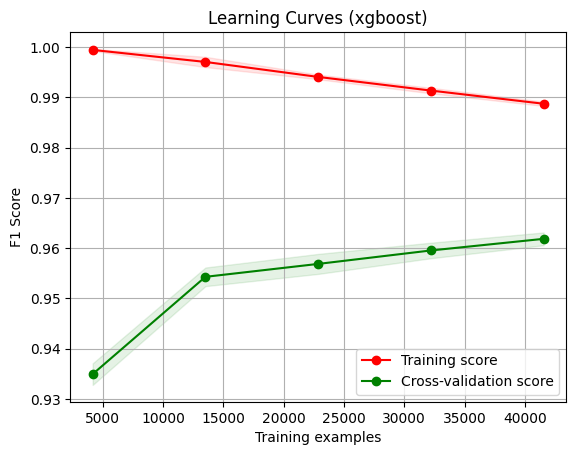

In [59]:
# Plot learning curves
plot_learning_curve(clf, "Learning Curves (xgboost)", X_train, y_train, cv=5)

plt.show()


In [60]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

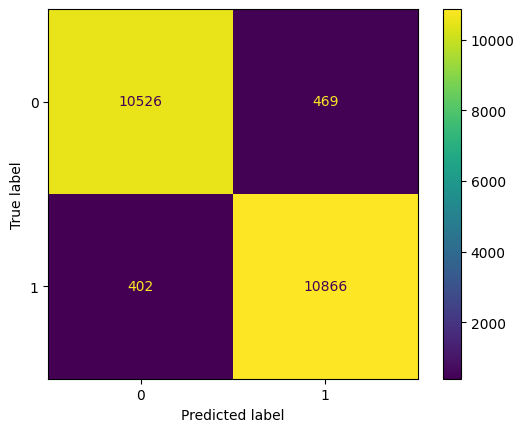

In [61]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [62]:
# classification Report 
report_test = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     10995
           1       0.96      0.96      0.96     11268

    accuracy                           0.96     22263
   macro avg       0.96      0.96      0.96     22263
weighted avg       0.96      0.96      0.96     22263



In [63]:
# Saving The Model

In [64]:
pickle.dump(clf, open('model.pkl', 'wb'))